<a href="https://colab.research.google.com/github/gamecicn/TF2_Study/blob/NeteaseCourse/T2E5_Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Weather Forecast

A Regression example


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings

# Add this to force matplot render the figer in the notebooko
warnings.filterwarnings("ignore")

In [44]:
features = pd.read_csv('/content/drive/MyDrive/DS_data/TensorFlowEx/WeatherForecast/temps.csv')
features.head()

raw_features = features.copy()

year,moth,day,week分别表示的具体的时间
- temp_2：前天的最高温度值
- temp_1：昨天的最高温度值
- average：在历史中，每年这一天的平均最高温度值
- actual：这就是我们的标签值了，当天的真实最高温度
- friend：这一列可能是凑热闹的，你的朋友猜测的可能值，咱们不管它就好了

### Process Time

In [8]:
import datetime

# datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) 
            for year, month, day 
                 in zip(features['year'], features['month'], features['day'])]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

dates[:2]

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

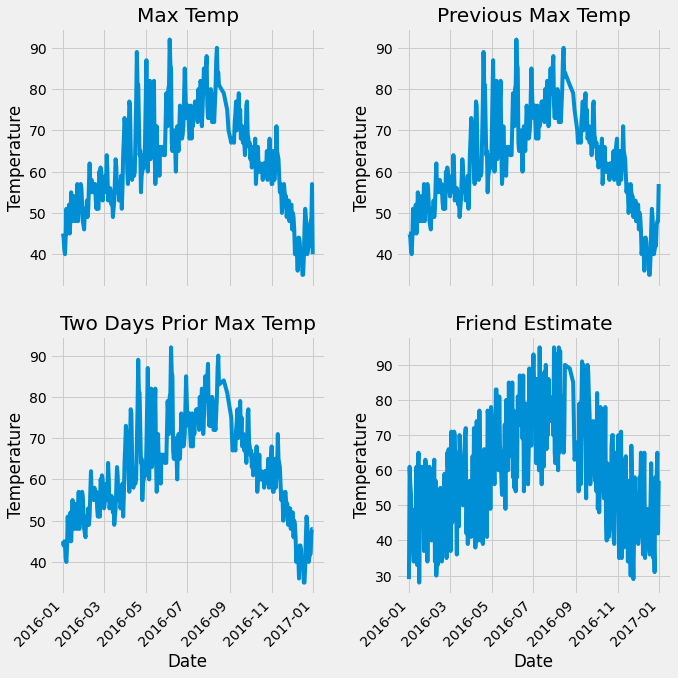

In [10]:
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# acutal value
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# temp_1
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# temp_2
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# friends
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')


plt.tight_layout(pad=2)

In [14]:
# One Hot encoding
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [15]:
# save labels
labels = features.pop('actual')

In [28]:
# Drop uesless columns
features = features.drop(axis=1, columns=["year", "month", "day", "friend"])

KeyError: ignored

In [29]:
features.head()

,temp_2,temp_1,average,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45,45,45.6,1,0,0,0,0,0,0
1,44,45,45.7,0,0,1,0,0,0,0
2,45,44,45.8,0,0,0,1,0,0,0
3,44,41,45.9,0,1,0,0,0,0,0
4,41,40,46.0,0,0,0,0,0,1,0


In [26]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [35]:
features.to_numpy()[0]

array([45. , 45. , 45.6,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [31]:
input_features[0]

array([-1.48452388, -1.49443549, -1.3470703 ,  2.44131112, -0.40482045,
       -0.40961596, -0.40482045, -0.40482045, -0.41913682, -0.40482045])

### Build Model

In [40]:
model = tf.keras.Sequential([                       
  layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)),
  layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)),
  layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03))
  ])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')

model.fit(input_features, labels, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
5/5 [==============================] - 1s 68ms/step - loss: 4457.1016 - val_loss: 2872.2200
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 4361.8979 - val_loss: 2795.8127
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 4187.2010 - val_loss: 2701.2285
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 4104.8429 - val_loss: 2539.1709
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 3764.7601 - val_loss: 2086.4617
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 2373.7899 - val_loss: 241.5420
Epoch 7/10
5/5 [==============================] - 0s 9ms/step - loss: 105.7149 - val_loss: 20.1858
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 29.7701 - val_loss: 47.5865
Epoch 9/10
5/5 [==============================] - 0s 8ms/step - loss: 62.0619 - val_loss: 32.9089
Epoch 10/10
5/5 [==============================] - 0s 9ms/step - loss: 43.5195 - val_loss: 6

In [45]:
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# 同理，再创建一个来存日期和其对应的模型预测值
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)}) 

NameError: ignored

In [ ]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# 图名
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');
